# Guiding questions

How does gender diversity at Columbia among first-time, full-time graduate students compare to its peer institutions?

In [1]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TOTALS = pickle.load(open('../../../data/SE-Broad_Sex_FTFTGraduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    inst_stats = TOTALS[year]['Columbia University in the City of New York']
    for seh in inst_stats.keys():
        for field in inst_stats[seh].keys():
            fields[seh].add(field)

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1999 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [5]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2, figsize=8):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(figsize * cols, figsize * rows))

# Returns female proportions for an institution in a field
def get_proportions(seh, field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst][seh].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            proportions.append(field_stats.get('Female', 0) / field_stats['Total for selected values'])
    return proportions

# Plots female proportions for every institution for a field, highlighting one, in a line graph
def plot_inst(ax, seh, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst != highlight:
            ax.plot(years, get_proportions(seh, field, inst), label=inst)
    ax.plot(years, get_proportions(seh, field, highlight), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# Returns female and male headcounts for a field in an institution
def get_counts(seh, field, inst='Columbia University in the City of New York'):
    females = []
    males = []
    for year in years:
        stats = TOTALS[year][inst][seh].get(field, None)
        if stats is None:
            females.append(None)
            males.append(None)
            continue
        females.append(stats.get('Female', 0))
        males.append(stats.get('Male', 0))
    return females, males

# Plots a female and male headcounts line graph for a field in an institution
def plot_counts(ax, seh, field, inst='Columbia University in the City of New York'):
    females, males = get_counts(seh, field, inst)
    ax.plot(years, females, label='Female')
    ax.plot(years, males, label='Male')
    ax.legend()
    ax.set_title(f'{field}: Columbia\'s headcounts by sex')
    ax.set_ylabel('Number of people')

In [19]:
def plot_topic(seh):
    detailed_fields = fields[seh]
    fig, axArr = subplots(len(detailed_fields)*2, cols=2)

    for i, field in enumerate(detailed_fields):
        if len(detailed_fields) == 1:
            plot_inst(axArr[0], seh, field)
            plot_counts(axArr[1], seh, field)
            break
        plot_inst(axArr[i, 0], seh, field)
        plot_counts(axArr[i, 1], seh, field)

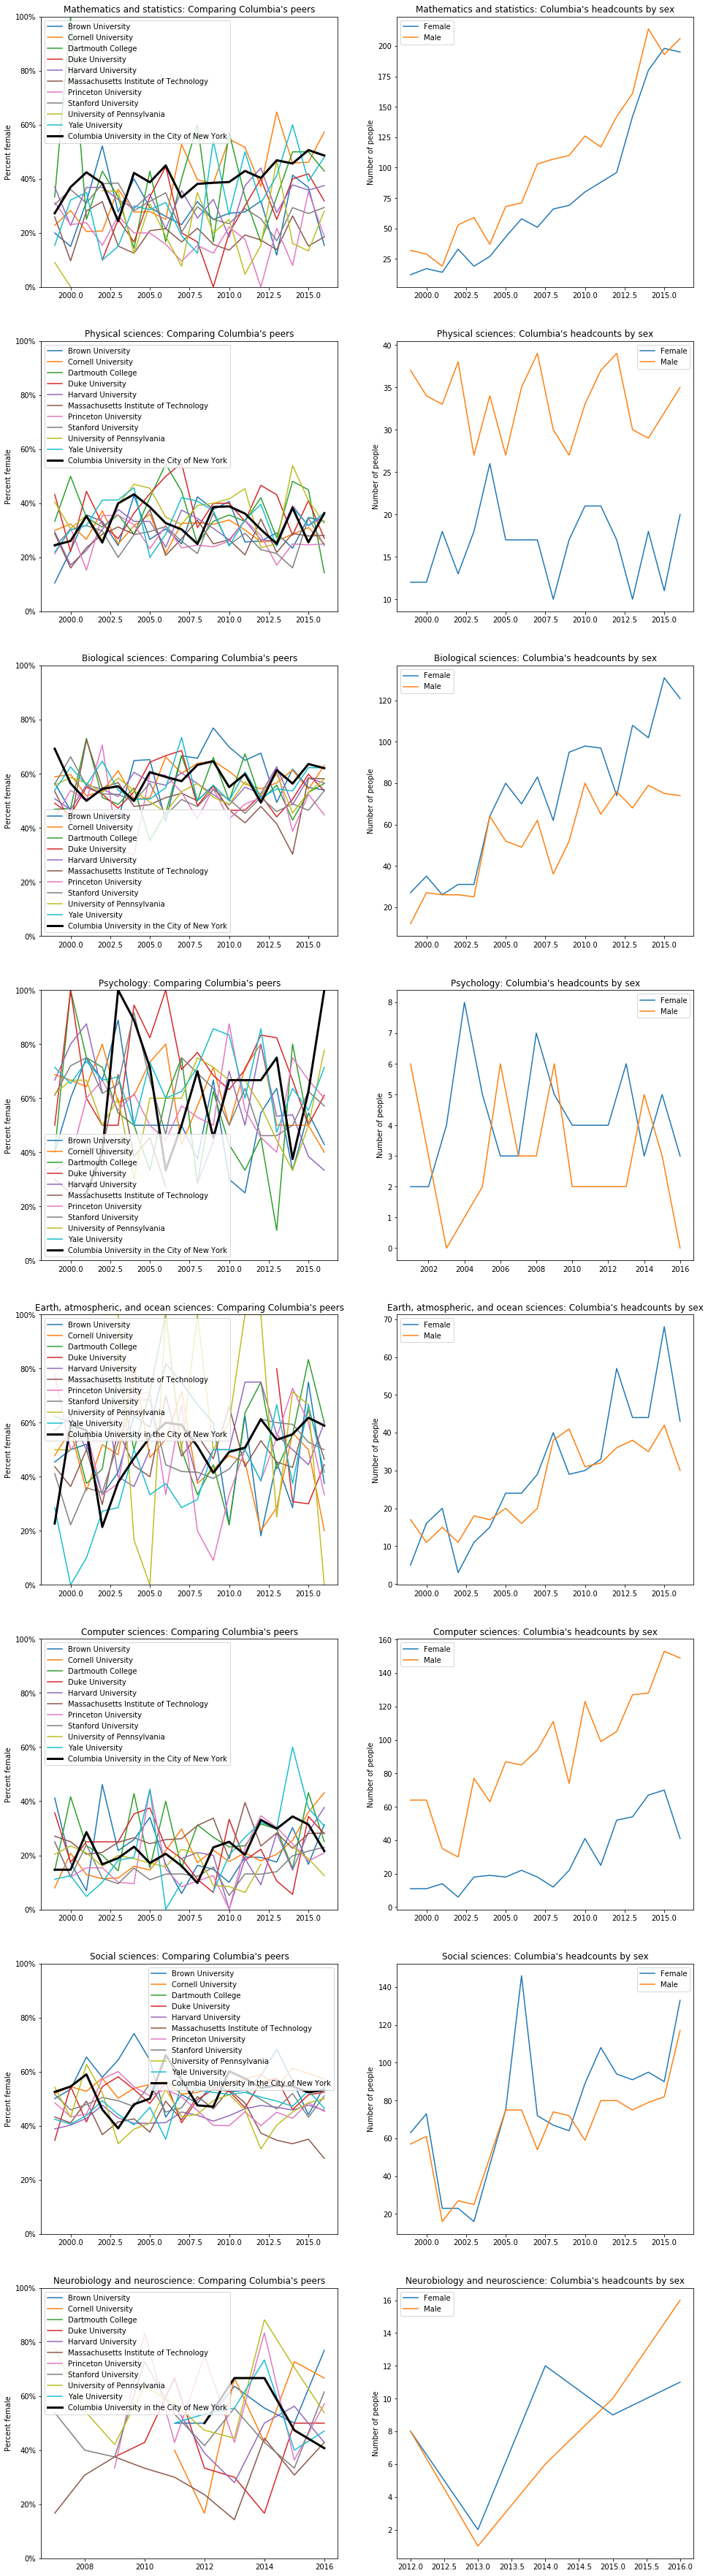

In [9]:
plot_topic('Science')

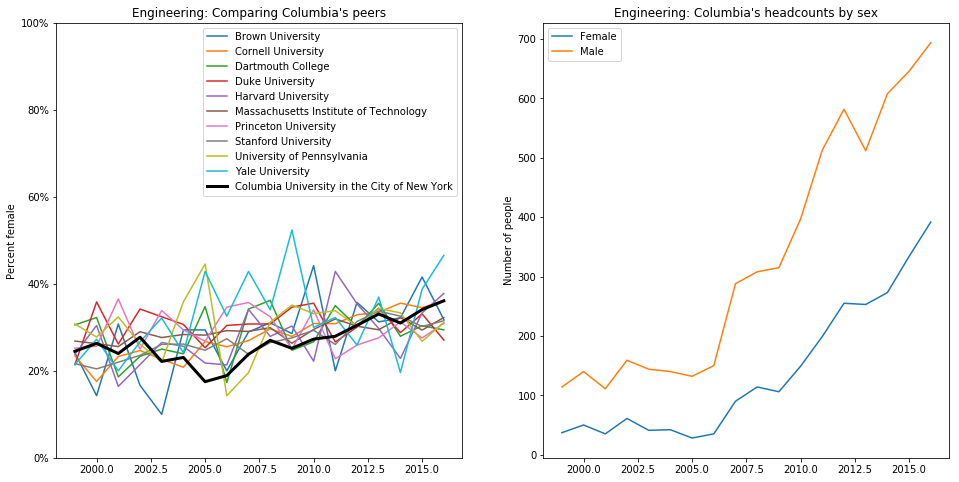

In [20]:
plot_topic('Engineering')